In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.seasonal import STL, seasonal_decompose
from helpers import clean_google, stitch_series, plot_missing, plot_google
import seaborn as sns

In [2]:
# Create dict for abbreviation mapping
cantons = {'Zürich':'ZH', 'Zug':'ZG', 'Uri':'UR', 'Nidwalden':'NW', 'Obwalden':'OW', 'Thurgau':'TG', 'Freiburg':'FR', 'Neuenburg':'NE', 'Genf':'GE', 'Jura':'JU', 'Wallis':'VS', 'Waadt':'VD', 'Graubünden':'GR', 'Sankt_Gallen':'SG', 'Tessin':'TI', 'Schwyz':'SZ', 'Schaffhausen':'SH', 'Luzern':'LU', 'Glarus':'GL', 'Basel-Stadt':'BS', 'Basel-Landschaft':'BL', 'Bern':'BE', 'Aargau':'AG', 'Appenzell_Innerrhoden':'AI', 'Appenzell_Ausserrhoden':'AR', 'Solothurn':'SO'}  
# Reverse for reverse lookup
cantons_rev = dict()
for key, value in cantons.items():
    cantons_rev[value] = key

In [3]:
# Import folder path from config file
from config import SCRAPER_PATH
path = SCRAPER_PATH

# List all files in google_search_trends folder
all_files = [file for file in os.listdir(path)]

# Dictionary to store dataframes
google_data = {}

# Loop through each file in the folder
for filename in all_files:
    if filename.endswith('.csv'):
        # Extract the query name from the filename
        query_name = filename.split('.csv')[0]
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(SCRAPER_PATH, filename))
        
        # Store the DataFrame in the dictionary
        google_data[query_name] = df

In [4]:
for query in google_data.keys():
    df = google_data[query]

    # Convert the 'Day' column to datetime
    df['Day'] = pd.to_datetime(df['Day'])

    # Set 'Day' as the index
    df.set_index('Day', inplace=True)

    # Resample to get weekly averages
    weekly_avg = df.resample('W').mean()
    weekly_avg.rename_axis('Week', inplace=True)
    # Update df to weekly resolution
    google_data[query] = weekly_avg

In [5]:
google_data['Grippe']

,Grippe: (Zurich),Grippe: (Canton of Zug),Grippe: (Switzerland)
Week,,,
2013-01-06,27.500000,7.166667,48.833333
2013-01-13,25.000000,3.142857,52.857143
2013-01-20,35.285714,14.714286,54.428571
2013-01-27,43.142857,10.285714,65.428571
2013-02-03,53.571429,15.428571,83.714286
2013-02-10,66.714286,21.285714,87.000000
2013-02-17,38.285714,12.714286,84.571429
2013-02-24,39.142857,27.142857,71.857143
2013-03-03,31.714286,0.000000,57.000000


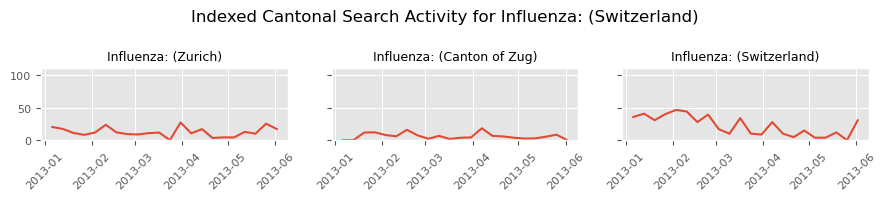

In [7]:
plot_google(google_data['Influenza'])